
# UNIVERSIDAD POLITECNICA SALESIANA
# REDES ADALINE

### Christian Dutan
## HISTORIA
+ A finales de los 50s Widrow empiea a trabajar en redes neuronales
+ La Red ADALINE Fue desarrollada en 1960 por Bernard Widrow y Marcian Hoff en Stanford 
+ Adaline: ADAptive LINear Element
+ Adaline: única neurona de salida
+ Existe una variante que permite varias neuronas de salida denominada MADALINE

### Bernard Widrow

 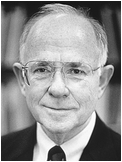

Bernard Widrow (nacido el 24 de diciembre de 1929) profesor de Stanford en el área de ingeniería eléctrica misma que es su especialidad, es considerado el co-inventor del algoritmo de filtro minimos cuadrados (LMS), junto a su estudiante de doctorado Ted Hoff. El algoritmo LMS condujo a las redes neuronales artificiales ADALINE y MADALINE ya la técnica de propagación hacia atrás. Entre otras contribuciones fundamentales al desarrollo del procesamiento de señales en los campos de la geofísica, las antenas adaptativas y el filtrado adaptativo.

### Marcian Hoff

 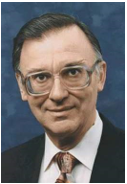

Marcian Hoff (nacido el 28 de octubre de 1937) el co-inventor del microprocesador contribuyo en el desarrollo de circuitos integrados Recibió su Ph.D. de la Universidad de Stanford en 1962 y se mantuvo como investigador asociado en el área de computadoras hasta 1968. Hoff se unió a Intel como Gerente de Investigación de Aplicaciones en 1968, se convirtió en miembro de Intel en el 80 y permaneció en este cargo hasta el 83. Hoff ha recibido el premio Stuart Ballantine del Instituto Franklin, el Premio Cledo Brunetti y posee una Medalla del Centenario IEEE y es miembro de Sigma Xi y de la IEEE.

## Caractersticas

+ Utiliza un algoritmo diferente al del perceptron:
+ Regla mínimo Error
+ Cuadrado Medio LMS
+ Regla Delta
+ Regla de Widrow-Hoff
+ Funcion de Tranferencia es lineal (pureline)
+ Procesamiento de información utiliza funciones de activación tanto de entrada como de salida 
+ Puede resolver problemas de linelamente separables
+ La red ADALINE es menos sensible al ruido y a su vez minimiza el ruido
+ Dicha red tiene usos practicos en el procesamiento de señales digitales

## Diferencias 

|   DIFERENCIA             | PERCEPTRON                  |      ADALINE             |
| ------------------------ | :-------------------------: | ----------------------:  |
| Función de transferencia | ESCALON                     | lINEAL                   |
| Resolución de problemas  | Linealmente Separables      | Linealmente Separables   |
| Respecto al Ruido        | Sensible al ruido           | minimiza el ruido        |
| Algoritmo de aprendizaje | Regla del Perceptron        | LMS                      | 

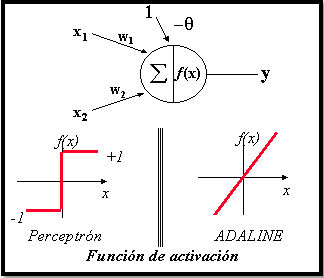



## Arquitectura ADALINE

+ Formado por un elemento llamado Combinador Adptivo Lineal (ALC)
+ La salida obtenida se aplica a un conmutado Bipolar

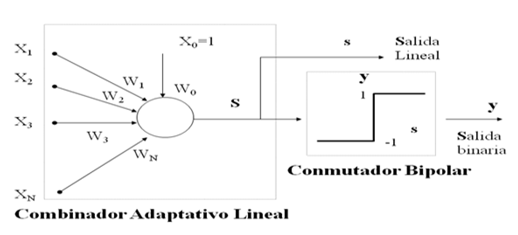

## Aplicaciones 

+ Son utilizados como filtro que eliminan ruido en señales de información
+ Se utiliza como filtro de ecualización en módems de alta velocidad
+ Elimina ruido en grabaciones ECG latidos del feto humano
+ Filtrado de eco en señales de comunicaciones de larga distancia
+ Filtrado de eco en señales de comunicaciones vía satélite 

## ADALINE regla delta

 El algoritmo utiliza patrones de entrenamientos formados por
Xp  vector de entrada y dp  salida deseada
 el aprendizaje se da mediante la diferencia entre la salida producida para cada patrón y la deseada (p)
(dp  -  yp )
Se utiliza una función de error para todo el conjunto de patrones 


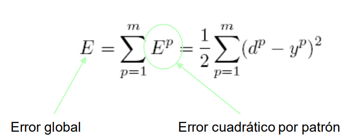



.




.






.








.
La regla busca que el conjunto minimice la función de error, el cual se realiza mediante un proceso iterativo el cual se llama descenso del gradiente

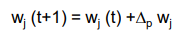

Se debe realizar un cambio en cada uno de los pesos proporcional a la derivda del error mediante el patrón actual y respecto del peso

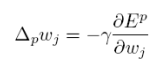

## ADALINE Proceso de aprendizaje 

+ Asignar valores a los pesos y al bias aleatoriamente 
+ Presentar un patrón de entrada
+ calcular la salida_obtenida
+ comparar la salida_deseada – salida_obtenida (dp  -  yp)
+ Para los pesos y el bias calcular  

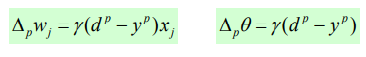

+ Modificar los pesos

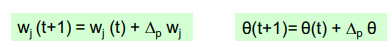

+ Repetir los pasos hasta cumplir el criterio de parada


## ADALINE Algoritmo LMS

Este algoritmo tiene mucha similitud al algoritmo utilizado en el perceptron:
Pasos:
+ Se asigna valores a los pesos 
+ aplicar un vector de entrada y obtener la salida correspondiente
+ Salida_obtenida = W*X
+ Error = Salida_deseada – Salida_obtenida
+ Wi = Wi + alpha * error * entrada i  




.


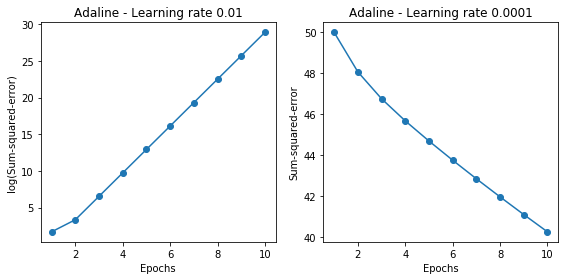

In [7]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


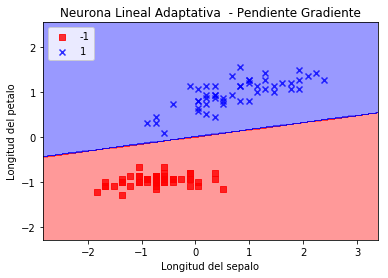

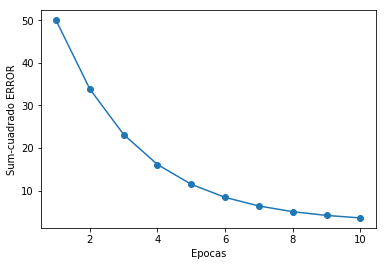

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

class AdaptiveLinearNeuron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter

   def fit(self, X, y):
      # weights
      self.weight = np.zeros(1 + X.shape[1])

      # Number of misclassifications
      self.errors = []

      # Cost function
      self.cost = []

      for i in range(self.niter):
         output = self.net_input(X)
         errors = y - output
         self.weight[1:] += self.rate * X.T.dot(errors)
         self.weight[0] += self.rate * errors.sum()
         cost = (errors**2).sum() / 2.0
         self.cost.append(cost)
      return self

   def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def activation(self, X):
      """Compute linear activation"""
      return self.net_input(X)

   def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(X) >= 0.0, 1, -1)

def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

# standardize
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# learning rate = 0.01
aln = AdaptiveLinearNeuron(0.01, 10)
aln.fit(X_std,y)

# decision region plot
plot_decision_regions(X_std, y, classifier=aln)

plt.title('Neurona Lineal Adaptativa  - Pendiente Gradiente')
plt.xlabel('Longitud del sepalo')
plt.ylabel('Longitud del petalo')
plt.legend(loc='upper left')

plt.show()

plt.plot(range(1, len(aln.cost) + 1), aln.cost, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Sum-cuadrado ERROR')



plt.show()

 ## Referencias
 
+ http://www.varpa.org/~mgpenedo/cursos/scx/archivospdf/Tema3-0.pdf
+ http://decsai.ugr.es/~castro/Neuro/D-PerceptronyAdaline/ppframe.htm
+ https://es.slideshare.net/mentelibre/redes-neuronales-adaline
+ http://ocw.uc3m.es/ingenieria-informatica/redes-de-neuronas/transparencias/Tema2%20PerceptronAdalineRN.pdf
+ http://rasbt.github.io/mlxtend/user_guide/classifier/Adaline/
+ https://www.kaggle.com/nikhil04/intro-to-perceptron-and-adaline-linear-neuron